## 各位同学好，这次作业我们来实践利用python的数据可视化

今天咱们要用到的数据还是NYSE的数据，没有数据的同学可以找班主任要哈，他那边有百度网盘~

这里展示的图片大家需要满足以下要求，每一个组图片按照以下要求给分：
1. 内容正确40%
2. 图标题、坐标轴标题清晰明了20%
3. 颜色选取清晰20% 
    > 注：对于有着不同意义的数据点要用**不同类型的点**做图例标注，避免歧义 `ax.set_prop_circle`, `sns.hls_palette`
4. 图片中信息分布合理20% 
    > 注：对于过分集中的数据采用对数坐标 `plt.gca().set_xscale`

## 图1：用饼图表示NYSE数据中2015年净利润（Net Income）最多的100家公司的行业（GICS Sector）组成（30 分）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

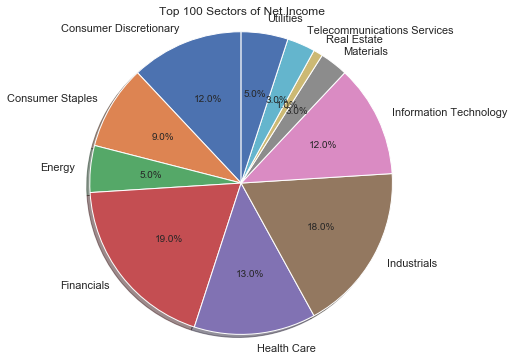

In [2]:
secs = pd.read_csv('nyse/securities.csv')
fund = pd.read_csv('nyse/fundamentals.csv')
df = pd.merge(secs, fund, how='inner', left_on='Ticker symbol', right_on='Ticker Symbol')

d1 = df[['GICS Sector','Net Income']][df['For Year'] == 2015]
d1g = d1.sort_values(by='Net Income',ascending=False).head(n=100).groupby('GICS Sector')
sectorcount = d1g.count()

labels = sectorcount.index
sizes = sectorcount.values.flatten()

plt.figure(figsize=(6,6))
plt.pie(sizes,  labels=labels, autopct='%1.1f%%',labeldistance=1.1,
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Top 100 Sectors of Net Income")

plt.show()


## 图2：在一张直方图中表示不同行业（GICS Sector）的营收（total revenue）分布（30 分）

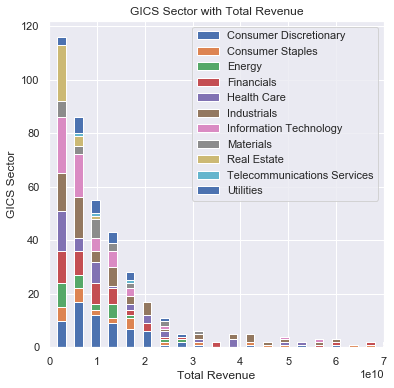

In [3]:
d2 = df[['GICS Sector','Total Revenue']][df['For Year'] == 2015]
d2g = d2.sort_values(by='Total Revenue',ascending=False).groupby('GICS Sector')

idxs = d2g.count().index
xlist = []
for i in idxs:
     xlist.append(d2.loc[d2['GICS Sector'] == i]['Total Revenue'].values.tolist())
        
plt.figure(figsize=(6,6))
plt.gca().set_xscale
plt.xlim(0,0.7e11)
plt.hist(xlist, bins='auto', rwidth=0.5, stacked=True, label=idxs)

plt.title('GICS Sector with Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('GICS Sector')
plt.legend()
plt.show()

## 图3：在一张二维散点图中表示不同行业的固定资产（Fixed Assets）/总资产（Total Assets）与盈利（Net Income）和营收(Total Revenue)的比例 （40 分）

/Users/wb213/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/wb213/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x432 with 0 Axes>

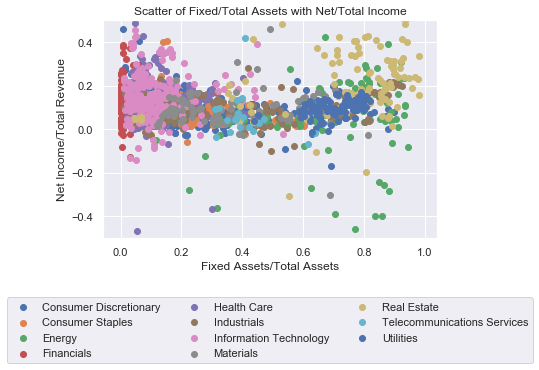

In [17]:
d3 = df[['GICS Sector','Fixed Assets','Total Assets','Net Income','Total Revenue']]
d3['f/t'] = d3['Fixed Assets'] / d3['Total Assets']
d3['n/t'] = d3['Net Income'] / d3['Total Revenue']

d3g = d3.groupby('GICS Sector')
idxs2 = d3g.count().index

plt.figure(figsize=(6,6))
fig, ax = plt.subplots(1,1)

fig.gca().set_xscale
for i in idxs2:
    xlist = d3.loc[d3['GICS Sector'] == i,'f/t'].values.tolist()
    ylist = d3.loc[d3['GICS Sector'] == i,'n/t'].values.tolist()
    ax.scatter(x=xlist, y=ylist,label=i)

    
plt.title('Scatter of Fixed/Total Assets with Net/Total Income')
ax.set_ylim(-0.5,0.5)
ax.set_xlabel('Fixed Assets/Total Assets')
ax.set_ylabel('Net Income/Total Revenue')
ax.legend(loc='lower center', bbox_to_anchor=(0.5,-0.6), ncol=3)
plt.show()